In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Use `pandas` to Read in Data Files

#### The `stars_and_blends.csv` file contains a truth label and image data for thousands of images.<br><br>The first column is the label, while the following 100 columns are the image data. These 100 values correspond to the flux values for 100 pixels (which make up a 10 x 10 pixel image. Examples plotted below). <br><br>A label of `0` corresponds to a single star, while a label of `1` corresponds to a stellar blend (including both line-of-sight blends and stellar binaries. See the `stellar_blend_classification.pdf` for more info on the differences between the two classes).

In [2]:
# Read in the csv file with the labels and image data
data = pd.read_csv("../../data/stars_and_blends.csv")

In [3]:
# Display the data
display(data)

,idx,class,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,...,pixel_90,pixel_91,pixel_92,pixel_93,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99
0,0,1,156.62683,141.30438,136.21732,146.54047,150.17270,135.53459,141.97180,139.92653,...,140.15384,134.55984,143.89368,150.54286,149.14265,137.10670,143.20221,145.33527,140.46939,139.58698
1,1,1,309.13373,292.06790,305.17847,288.71683,316.50340,308.41750,293.07590,296.23193,...,309.93723,306.52902,297.93060,320.67480,301.06464,321.33676,316.21960,306.92670,297.75546,295.51550
2,2,1,1812.00230,1829.71450,1806.07740,1794.05330,1857.23010,1826.03250,1806.68590,1831.20650,...,1833.05290,1833.73330,1832.28120,1806.10200,1829.93550,1809.85270,1812.51040,1812.95350,1838.17610,1835.88650
3,3,1,203.30963,213.02747,191.45403,187.97757,186.48967,177.51888,187.33359,192.73975,...,173.28897,186.48457,182.05667,181.87524,186.29561,180.80054,189.26610,186.32065,181.04028,178.88576
4,4,1,743.40130,780.95410,782.53060,804.43820,770.77670,790.73486,786.76380,775.35690,...,774.54620,808.75867,780.27344,797.94354,766.98737,793.65344,784.77690,772.65643,785.46120,780.04126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,27248,1,394.08970,403.50412,389.89755,383.93036,394.21670,402.08066,393.66623,398.47275,...,396.45642,387.94537,378.71274,394.62936,378.51350,406.36500,393.15625,390.90850,391.80804,401.58475
27249,27249,1,226.75377,216.44025,222.85257,231.12956,215.93462,224.14360,228.36986,231.16632,...,297.18417,477.68674,346.34750,270.67673,229.96810,236.23915,219.13628,225.17914,227.78926,214.09967
27250,27250,1,864.24320,825.41110,852.45600,844.61800,852.75360,850.32490,861.16560,830.34490,...,838.21640,830.75964,857.13990,858.10846,849.03000,860.69740,870.15027,839.08530,837.25750,829.34973
27251,27251,1,282.39905,282.79000,287.21704,283.29373,278.90573,275.18408,282.07568,284.10583,...,278.31200,280.43738,280.36392,283.70905,277.36540,273.26470,288.52817,278.70825,275.76572,272.38385


In [4]:
# Get the label data
label = data['class']

# Use .iloc to locate the image data within the DataFrame
image_data = data.iloc[:, 2:]

In [5]:
print("There are "+str(len(data[data['class']==0]))+' single stars in the dataset')
print("There are "+str(len(data[data['class']==1]))+' blended stars in the dataset')

There are 15110 single stars in the dataset
There are 12143 blended stars in the dataset


In [6]:
single_data = data.loc[data['class']==0].iloc[:,1:]
single_data.head()

,class,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_90,pixel_91,pixel_92,pixel_93,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99
7414,0,183.55238,184.68996,177.19502,188.77777,194.48502,190.91788,191.54294,183.66676,182.16234,...,187.29057,188.25009,190.30100,191.67421,189.07367,188.97116,175.90976,189.03340,194.67093,171.91210
7415,0,175.88846,163.86244,171.30846,174.64153,185.61397,185.93060,173.55817,180.00891,178.70297,...,173.45723,175.85414,186.38853,186.41702,186.98456,171.00014,192.56134,185.81767,176.41600,185.67210
7416,0,188.74867,197.53012,189.17107,187.81854,189.21805,193.22633,190.01570,201.47330,194.40955,...,201.26825,199.54730,190.35448,193.28674,189.05658,191.41783,184.85680,194.00053,192.50659,189.71457
7417,0,732.07855,747.88760,754.96045,769.50696,737.92850,728.54047,743.37650,727.83030,723.71440,...,754.73770,725.56256,750.00195,739.86770,745.15420,741.29004,749.04920,719.03510,732.20800,731.35425
7418,0,148.24915,148.33937,148.10149,151.48402,155.07130,143.07864,139.79453,148.90158,145.50807,...,150.58275,160.60738,143.72858,148.04391,140.93787,158.33510,150.34776,140.98064,145.12070,149.16824


In [7]:
blended_data = data.loc[data['class']==1].iloc[:,1:]
blended_data.head()

,class,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_90,pixel_91,pixel_92,pixel_93,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99
0,1,156.62683,141.30438,136.21732,146.54047,150.17270,135.53459,141.97180,139.92653,143.97969,...,140.15384,134.55984,143.89368,150.54286,149.14265,137.10670,143.20221,145.33527,140.46939,139.58698
1,1,309.13373,292.06790,305.17847,288.71683,316.50340,308.41750,293.07590,296.23193,299.48860,...,309.93723,306.52902,297.93060,320.67480,301.06464,321.33676,316.21960,306.92670,297.75546,295.51550
2,1,1812.00230,1829.71450,1806.07740,1794.05330,1857.23010,1826.03250,1806.68590,1831.20650,1810.68700,...,1833.05290,1833.73330,1832.28120,1806.10200,1829.93550,1809.85270,1812.51040,1812.95350,1838.17610,1835.88650
3,1,203.30963,213.02747,191.45403,187.97757,186.48967,177.51888,187.33359,192.73975,211.57552,...,173.28897,186.48457,182.05667,181.87524,186.29561,180.80054,189.26610,186.32065,181.04028,178.88576
4,1,743.40130,780.95410,782.53060,804.43820,770.77670,790.73486,786.76380,775.35690,780.36633,...,774.54620,808.75867,780.27344,797.94354,766.98737,793.65344,784.77690,772.65643,785.46120,780.04126


In [8]:
single_data = single_data.values
blended_data = blended_data.values
print(single_data.shape)
print(blended_data.shape)

(15110, 101)
(12143, 101)


In [9]:
# Read in the binary index file
binary_idx = pd.read_csv('../../data/additional_binary_class_indexes.csv')

# Make a copy of the original data, so that we don't overwrite it
data2 = data.copy()

# Loop over every index that is a binary star
for idx in binary_idx['index']:
    # Set the new class label to 2
    data2.at[idx, 'class'] = 2

# Save the data to a new file
data2.to_csv('../../data/data_with_binaries.csv', index=False)
data2.head()


,idx,class,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,...,pixel_90,pixel_91,pixel_92,pixel_93,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99
0,0,1,156.62683,141.30438,136.21732,146.54047,150.17270,135.53459,141.97180,139.92653,...,140.15384,134.55984,143.89368,150.54286,149.14265,137.10670,143.20221,145.33527,140.46939,139.58698
1,1,1,309.13373,292.06790,305.17847,288.71683,316.50340,308.41750,293.07590,296.23193,...,309.93723,306.52902,297.93060,320.67480,301.06464,321.33676,316.21960,306.92670,297.75546,295.51550
2,2,1,1812.00230,1829.71450,1806.07740,1794.05330,1857.23010,1826.03250,1806.68590,1831.20650,...,1833.05290,1833.73330,1832.28120,1806.10200,1829.93550,1809.85270,1812.51040,1812.95350,1838.17610,1835.88650
3,3,1,203.30963,213.02747,191.45403,187.97757,186.48967,177.51888,187.33359,192.73975,...,173.28897,186.48457,182.05667,181.87524,186.29561,180.80054,189.26610,186.32065,181.04028,178.88576
4,4,1,743.40130,780.95410,782.53060,804.43820,770.77670,790.73486,786.76380,775.35690,...,774.54620,808.75867,780.27344,797.94354,766.98737,793.65344,784.77690,772.65643,785.46120,780.04126


In [10]:
# check number of data in class
print("There are "+str(len(data2[data2['class']==0]))+' single stars in the dataset')
print("There are "+str(len(data2[data2['class']==1]))+' blended stars in the dataset')
print("There are "+str(len(data2[data2['class']==2]))+' binary stars in the dataset')

There are 15110 single stars in the dataset
There are 7414 blended stars in the dataset
There are 4729 binary stars in the dataset


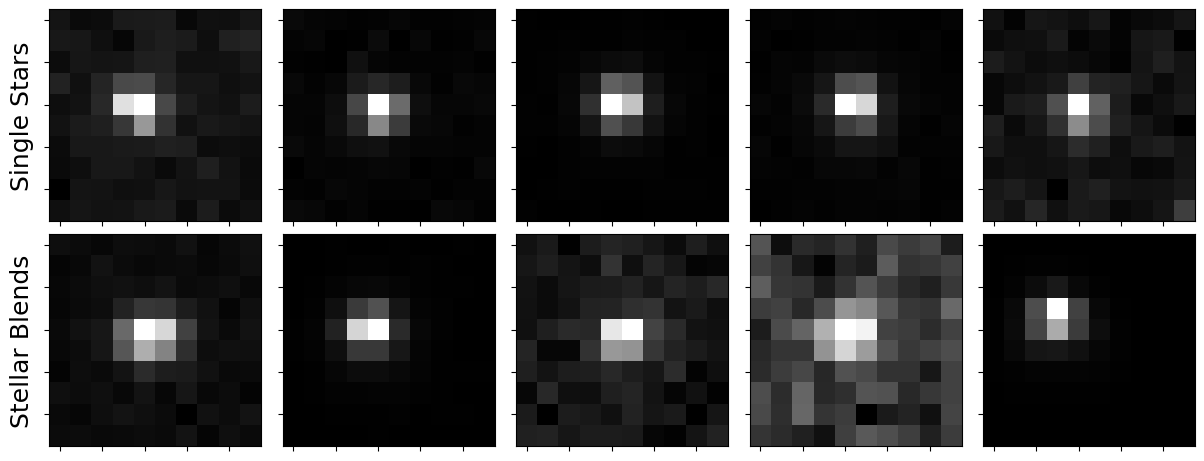

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, constrained_layout=True, figsize=(12, 4.5))

# turn axes off but keep y labels
for ax in axes.flatten():
    ax.set_yticklabels([])
    ax.set_xticklabels([])


for idx in range(0, 5):
    star = data2[data2['class']==0].sample(n=1, random_state=idx)
    star_image = star.iloc[:, 2:].values.reshape(10,10)
    axes[0,idx].imshow(star_image, cmap='gray')
    
    blend = data2[data2['class']==1].sample(n=1, random_state=idx)
    blend_image = blend.iloc[:, 2:].values.reshape(10,10)
    axes[1,idx].imshow(blend_image, cmap='gray')
    
    # binary = data2[data2['class']==2].sample(n=1, random_state=idx)
    # binary_image = binary.iloc[:, 2:].values.reshape(10,10)
    # axes[2,idx].imshow(binary_image, cmap='gray')
    
    
axes[0,0].set_ylabel("Single Stars", fontsize=18) 
axes[1,0].set_ylabel("Stellar Blends", fontsize=18)
# axes[2,0].set_ylabel("Stellar Binaries", fontsize=18) 
# save the figure with high resolution
plt.savefig('./Images/stars_and_blends.png', dpi=500)
plt.show()

In [12]:
# check if data has negative values
cnt = 0
total = 0
for i, row in enumerate(data.iloc[:,2:].values):
    for elem in row:
        total += 1
        if elem <= 0:
            cnt += 1
            print('row {} has a negative value'.format(i))
print("Only {} realization(s) has/have negative values out of a total of {} realizations.".format(cnt, total))

row 15226 has a negative value
Only 1 realization(s) has/have negative values out of a total of 2725300 realizations.


In [13]:
# find min pixel values across images
min_data = []
max_data = []
total = 0
for i, row in enumerate(data.iloc[:,2:].values):
    if i == 15226:
        pass
    else:
        min_data.append(np.amin(row))
        max_data.append(np.amax(row))

min_data = np.array(min_data)
max_data = np.array(max_data)

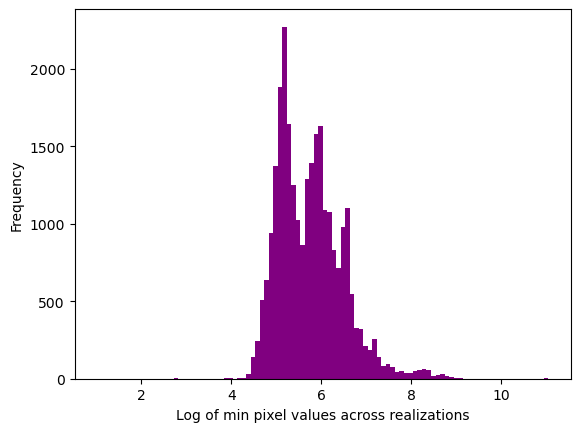

In [14]:
# distribution of min pixels across the images
plt.hist(np.log(min_data), bins=100, color='purple')
# plt.hist(max_data)
plt.xlabel('Log of min pixel values across realizations')
plt.ylabel('Frequency')
# plt.ylim([0,20])
# plt.title('Distribution of log min pixels across images')
# save plot with high resolution
plt.savefig('./Images/min_pixel_values.png', dpi=500)
plt.show()

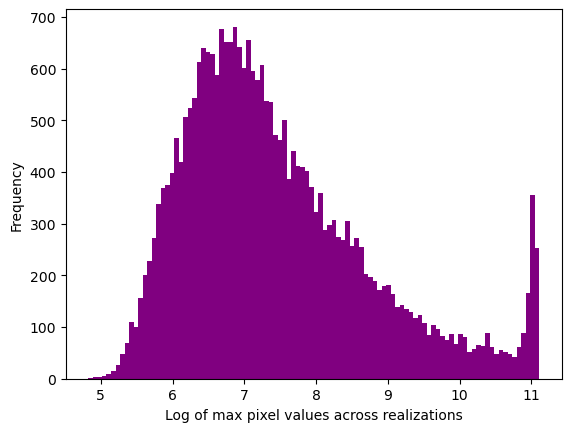

In [15]:
# distribution of min pixels across the images
plt.hist(np.log(max_data), bins=100, color='purple')
# plt.hist(max_data)
plt.xlabel('Log of max pixel values across realizations')
plt.ylabel('Frequency')
# plt.ylim([0,200])
# plt.title('Distribution of log max pixel across images')
# save plot with high resolution
plt.savefig('./Images/max_pixel_values.png', dpi=500)
plt.show()

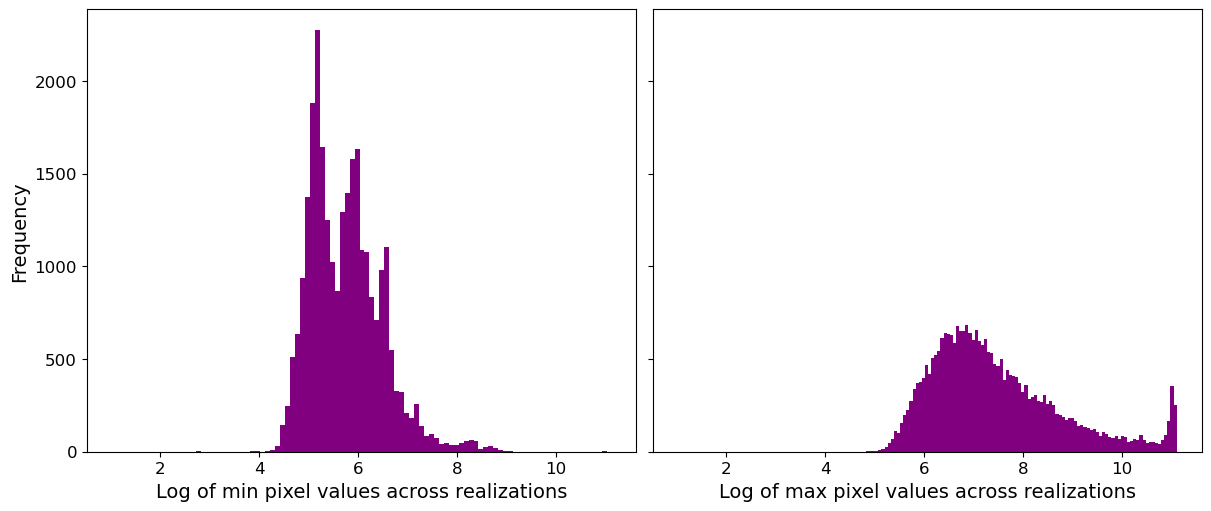

In [16]:
# plot the min and max distros in a row
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, constrained_layout=True, figsize=(12, 5))
axes[0].hist(np.log(min_data), bins=100, color='purple')
axes[1].hist(np.log(max_data), bins=100, color='purple')
axes[0].set_xlabel('Log of min pixel values across realizations')
axes[1].set_xlabel('Log of max pixel values across realizations')
axes[0].set_ylabel('Frequency')
# axes[1].set_ylabel('Frequency')
# axes[0].set_title('Distribution of log min pixels across images')
# axes[1].set_title('Distribution of log max pixel across images')
# set fontsize for all labels
for ax in axes.flatten():
    ax.tick_params(labelsize=12)
# set fontsize for title
for ax in axes:
    ax.title.set_fontsize(16)
# set fontsize for axis labels
for ax in axes:
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
# save plot with high resolution
plt.savefig('./Images/log_min_max_pixel_values.png', dpi=500)
plt.show()